In [2]:
import tensorflow as tf

In [3]:
from tensorflow.keras import models,layers

In [4]:
import matplotlib.pyplot as plt

In [5]:
IMAGE_SIZE = 256
BATCH_SIZE =32
CHANNELS=3
EPOCHS=5


In [6]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
 r"C:\Users\Sakthi\Potato leaf\PlantVillage",
 shuffle =True,
 image_size = (IMAGE_SIZE, IMAGE_SIZE),
 batch_size = BATCH_SIZE
)

Found 2153 files belonging to 3 classes.


In [7]:
class_names = dataset.class_names
class_names


['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [8]:
for image_batch, labels_batch in dataset.take(1):
 print(image_batch[0].shape)

(256, 256, 3)


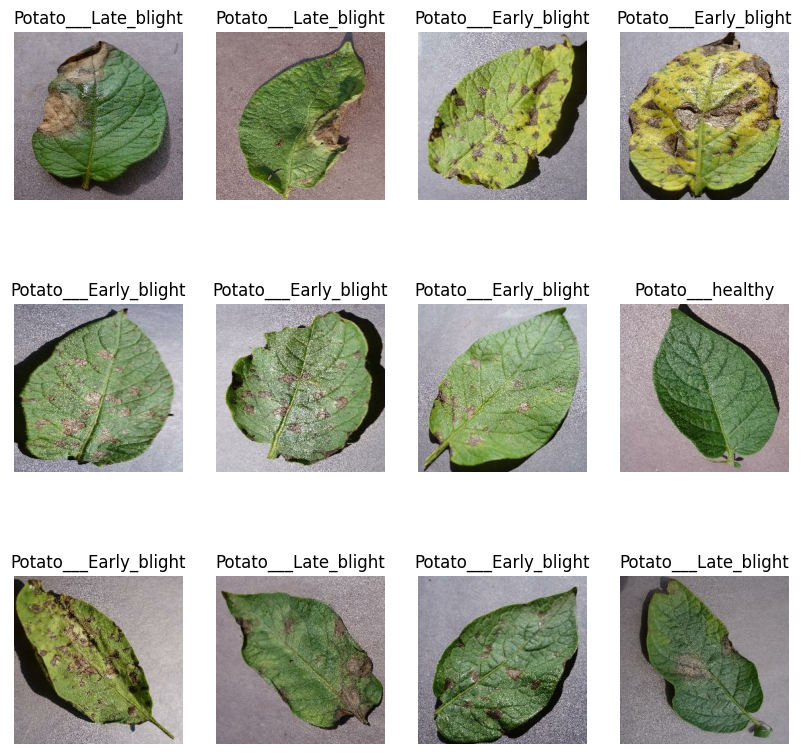

In [9]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
 for i in range(12):
     ax = plt.subplot(3, 4, i + 1)
     plt.imshow(image_batch[i].numpy().astype("uint8"))
     plt.title(class_names[labels_batch[i]])
     plt.axis("off")


In [10]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1,test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)
    if shuffle:
     ds = ds.shuffle(shuffle_size, seed=12)

     train_size = int(train_split * ds_size)
     val_size = int(val_split * ds_size)

     train_ds = ds.take(train_size)
     val_ds = ds.skip(train_size).take(val_size)
     test_ds = ds.skip(train_size).skip(val_size)

     return train_ds, val_ds, test_ds


In [11]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)
train_ds =train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds =val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds =test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


In [12]:
resize_and_rescale = tf.keras.Sequential([
 tf.keras.layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
 tf.keras.layers.Rescaling(1.0/255),
])
data_augmentation = tf.keras.Sequential([
 tf.keras.layers.RandomFlip("horizontal_and_vertical"),
 tf.keras.layers.RandomRotation(0.2),
])


In [13]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE,
CHANNELS)
n_classes = 3


In [14]:
model = models.Sequential([
 resize_and_rescale,
 layers.Conv2D(32,(3,3), activation='relu', input_shape=input_shape),
 layers.MaxPooling2D((2, 2)),
 layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
 layers.MaxPooling2D((2, 2)),
 layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
 layers.MaxPooling2D((2, 2)),
 layers.Conv2D(64, (3, 3), activation='relu'),
 layers.MaxPooling2D((2, 2)),
 layers.Conv2D(64, (3, 3), activation='relu'),
 layers.MaxPooling2D((2, 2)),
 layers.Conv2D(64, (3, 3), activation='relu'),
 layers.MaxPooling2D((2, 2)),
 layers.Flatten(),
 layers.Dense(64, activation='relu'),
 layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape=input_shape)

C:\Users\Sakthi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (32, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (32, 4, 4, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (32, 2, 2, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 256)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 64)                    │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 3)                     │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(
 optimizer='adam',

loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
 metrics=['accuracy']
)
history = model.fit(
 train_ds,
 batch_size=BATCH_SIZE,
 validation_data=val_ds,
 verbose=1,
 epochs=5,
)
scores = model.evaluate(test_ds)


Epoch 1/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 170s 3s/step - accuracy: 0.4283 - loss: 0.9612 - val_accuracy: 0.6823 - val_loss: 0.7430
Epoch 2/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 157s 3s/step - accuracy: 0.6766 - loss: 0.7199 - val_accuracy: 0.7917 - val_loss: 0.4701
Epoch 3/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 156s 3s/step - accuracy: 0.8225 - loss: 0.3923 - val_accuracy: 0.8698 - val_loss: 0.3416
Epoch 4/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 158s 3s/step - accuracy: 0.8854 - loss: 0.2617 - val_accuracy: 0.8854 - val_loss: 0.3080
Epoch 5/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 204s 3s/step - accuracy: 0.9109 - loss: 0.2215 - val_accuracy: 0.9010 - val_loss: 0.1902
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 782ms/step - accuracy: 0.9442 - loss: 0.1341


In [17]:
import numpy as np

first image to predict
actual label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 812ms/step
predicted label: Potato___Early_blight


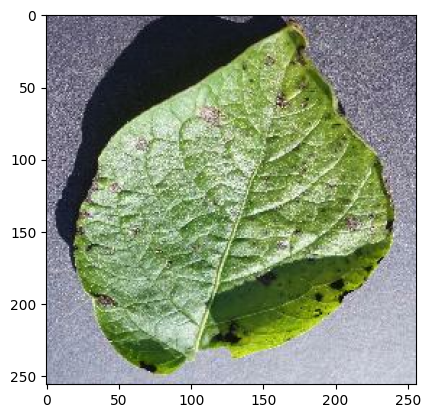

In [22]:
for images_batch, labels_batch in test_ds.take(1):
 #print(images_batch[0])
 first_image = images_batch[0].numpy().astype('uint8')
 first_label = labels_batch[0].numpy()

 print("first image to predict")
 plt.imshow(first_image)
 print("actual label:",class_names[first_label])

 batch_prediction = model.predict(images_batch)
 print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [24]:
def predict(model, img):
 img_array =tf.keras.preprocessing.image.img_to_array(images[i].numpy())
 img_array = tf.expand_dims(img_array, 0)
 predictions = model.predict(img_array)
 predicted_class = class_names[np.argmax(predictions[0])]
 confidence = round(100 * (np.max(predictions[0])), 2)
 return predicted_class, confidence


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


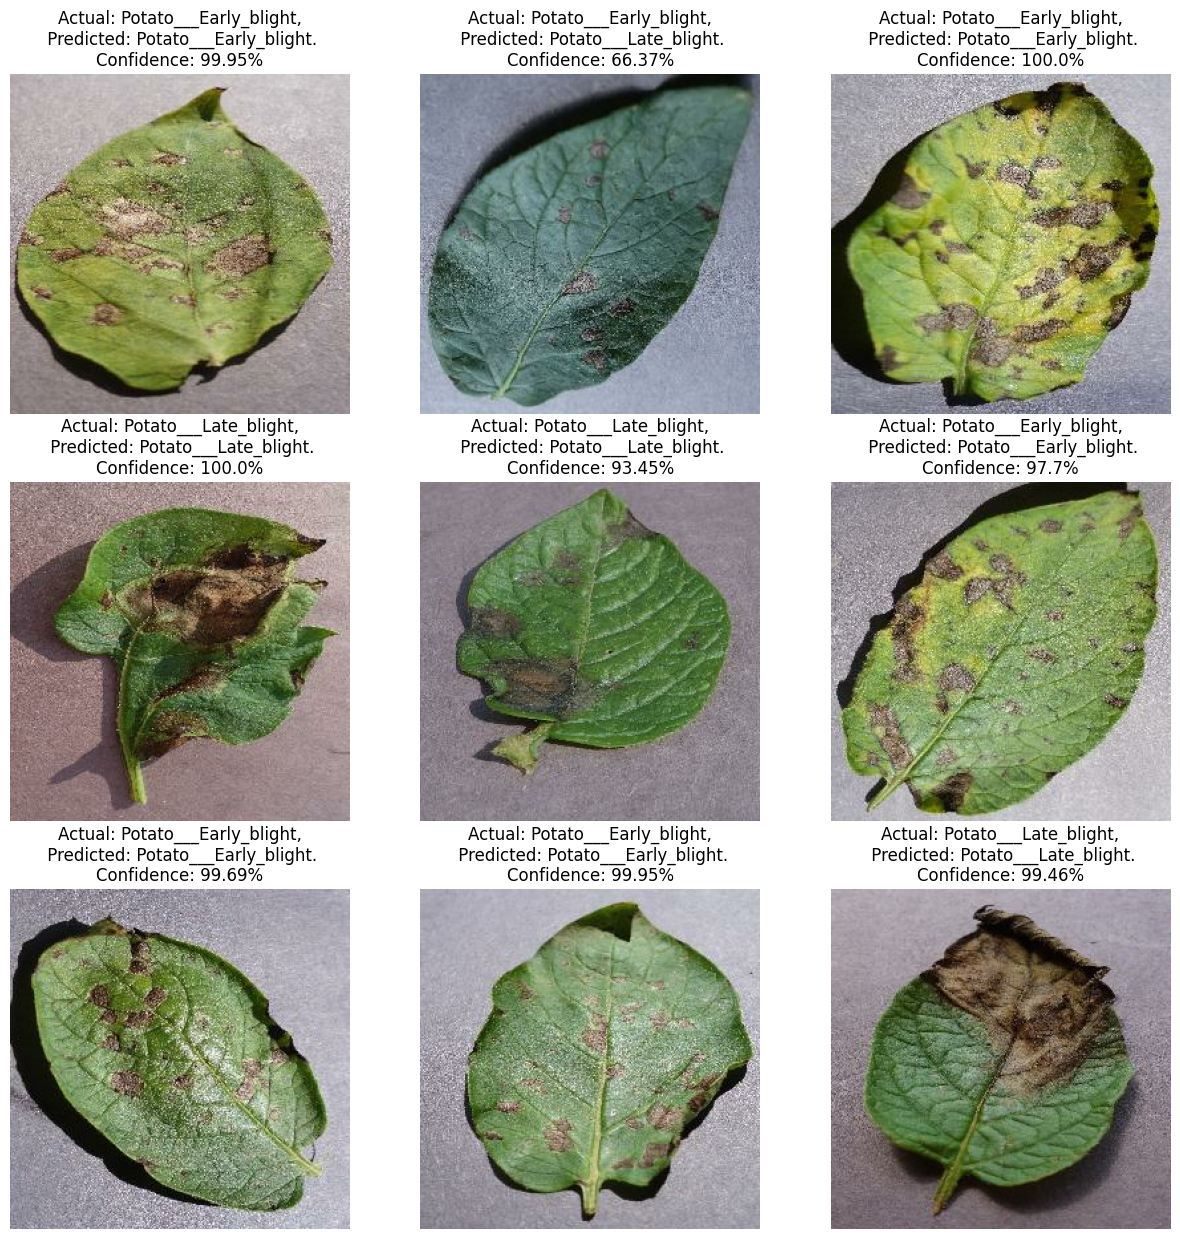

In [28]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
 for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))

    predicted_class, confidence = predict(model, images[i].numpy())
    actual_class = class_names[labels[i]]

    plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\nConfidence: {confidence}%")

    plt.axis("off")


In [41]:
import os

models_dir = "../models"
os.makedirs(models_dir, exist_ok=True)
existing_versions = [int(i.split('.')[0]) for i in os.listdir(models_dir) if i.split('.')[0].isdigit()]
model_version = max(existing_versions, default=0) + 1
model.save(f"{models_dir}/{model_version}.keras")

